# Math and Statistics Review for ML
Using the smallpox data set, review relevant mathematical and statistical methods commonly used in machine learning. An example will be shown using the Utah data. Choose another state and perform the same operations on the data for that state.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('http://apmonitor.com/pds/uploads/Main/smallpox.txt')
data.head()

,week,state,state_name,disease,cases,incidence_per_capita
0,192801,AL,ALABAMA,SMALLPOX,1,0.04
1,192801,AR,ARKANSAS,SMALLPOX,7,0.38
2,192801,AZ,ARIZONA,SMALLPOX,0,0.00
3,192801,CA,CALIFORNIA,SMALLPOX,18,0.34
4,192801,CO,COLORADO,SMALLPOX,31,3.06


### Summary Statistics with Pandas describe() Function

Pandas imports data, generates summary statistics, and manipulates data tables. There are many functions that allow efficient manipulation for the preliminary steps of data analysis problems. The data.describe() command gives a table of summary statistics.

In [2]:
data.describe()

,week,cases,incidence_per_capita
count,50916.000000,50916.000000,50916.000000
mean,193809.850636,4.572787,0.249108
std,591.489888,15.062277,0.824331
min,192801.000000,0.000000,0.000000
25%,193312.000000,0.000000,0.000000
50%,193819.000000,0.000000,0.000000
75%,194324.000000,2.000000,0.090000
max,195250.000000,350.000000,50.360000


# Mathematics

### Scalars, Vectors, and Matrices
**Scalars** are simple numerical values, and are typically denoted by an italicized letter, like _x_ or _a_.

**Vectors** are ordered lists of scalar values, and are denoted with bold letters, such as **x** or **w**. The specific attribute of a vector is denoted by a superscript, like so: _w_$^{(j)}$. For example, the vector **w** = [3,2] has the attribute _w_$^{(1)}$ = 3.

**Matrices** are rectangular arrays of numbers arranged in rows or columns, and are denoted with bold capital letters, such as **A** or **W**.

In Python, matrices and vectors are called "arrays."

In [3]:
UT = data[data['state'] == 'UT']

# Create a matrix containing data from the 'cases' and 'indicence_per_capita' columns
matrix = UT[['cases','incidence_per_capita']].values
print('Matrix:',matrix)
print('Dimensions:',matrix.shape)

Matrix: [[19.    3.77]
 [33.    6.55]
 [17.    3.37]
 ...
 [ 0.    0.  ]
 [ 0.    0.  ]
 [13.    1.99]]
Dimensions: (1055, 2)


In [4]:
# The vector is composed of the values in the '0'
#    column (first columns) of the matrix
# Use the : to get all values in the row, and
#    the 0 to get all values in the '0' column
vector = matrix[:,0]
print('Vector:',vector)
print('Dimension:',vector.shape)

Vector: [19. 33. 17. ...  0.  0. 13.]
Dimension: (1055,)


In [5]:
# Create a scalar out of the 6th attribute of the vector
# Python starts counts with the number 0, so the [5]
#   indicates the 6th value in the array
scalar = vector[5]
print('Scalar:',scalar)
print('Dimension:',scalar.shape)

Scalar: 4.0
Dimension: ()


**Activity:**
1. Create a matrix **X** out of the 'cases' and 'incidence_per_capita' columns of a state of your choice
2. Create a vector **x** containing all the values in the 'incidence_per_capita' column of **X**
3. Create a scalar _x_$^{(12)}$ from the 12th value in **x** (remember to use x[11])
4. Find the dot product between the 2 distinct vectors in matrix **X**. It may be helpful to import numpy and use np.dot()

In [17]:
import numpy as np
CO = data[data['state'] == 'CO']
X = CO[['cases','incidence_per_capita']].values
print('Matrix:',X)
print('Dimensions:',X.shape)

x = X[:,1]
print("Vector:", x)
x_12 =x[11]
print("Scalar:", x_12)

y = X[:,0]
prod = np.dot(x,y)
print("Dot Product:", prod)




Matrix: [[31.    3.06]
 [18.    1.78]
 [23.    2.27]
 ...
 [ 1.    0.08]
 [ 1.    0.08]
 [ 1.    0.08]]
Dimensions: (1058, 2)
Vector: [3.06 1.78 2.27 ... 0.08 0.08 0.08]
Scalar: 0.2
Dot Product: 6794.79


### Summations and Products
It's sometimes useful to sum or multiply all attributes of a vector. The notation for summations over a vector **x** = [x$^{(1)}$,x$^{(2)}$,...x$^{(n-1)}$,x$^{(n)}$] looks like this:

$$\sum_{i=1}^nx^{(i)} = x^{(1)} + x^{(2)} + ...+x^{(n-1)} + x^{(n)}$$

Similarly, the product is summarized using the capital pi notation:

$$\prod_{i=1}^nx^{(i)} = x^{(1)} \cdot x^{(2)} \cdot ...\cdot x^{(n-1)} \cdot x^{(n)}$$

In [ ]:
# Find the total number of smallpox cases over all time in Utah
UT_sum = np.sum(UT['cases'])
print('Sum:',UT_sum)

**Activity**: Find the total number of cases in another state.

In [18]:
print("Total Cases CO:", sum(y))

Total Cases CO: 3999.0


### Derivatives and Gradients
You should be familiar with analytical derivatives and gradients from calculus courses. While these are most commonly used behind the scenes to solve problems, it's useful to know about these for two reasons. First, you should understand how a numerical derivative works. Second, you may find it beneficial to use the numerical derivative as an additional feature for your machine learning model. You can calculate the numerical derivative as follows:

In [ ]:
# Be sure the data is sorted according to week
UT = UT.sort_values(by=['week'])

# Find the difference in cases for each consecutive week
UT['dcases'] = UT['cases'].diff()

# Find the difference in weeks for each consecutive week
#  should be 1, except for when there are missing weeks
UT['dweeks'] = UT['week'].diff()

# Find the numerical derivative, dcases/dweeks
UT['dcases/dweeks'] = UT['dcases'] / UT['dweeks']

# Plot the numerical derivative
UT['dcases/dweeks'].plot()

**Activity:**
1. Find the weekly difference in smallpox cases for your state.
2. Calculate the numerical derivative (finite difference) for weekly smallpox cases.
3. Plot the numerical derivative for weekly smallpox cases. Interpret the graph.

<Axes: >

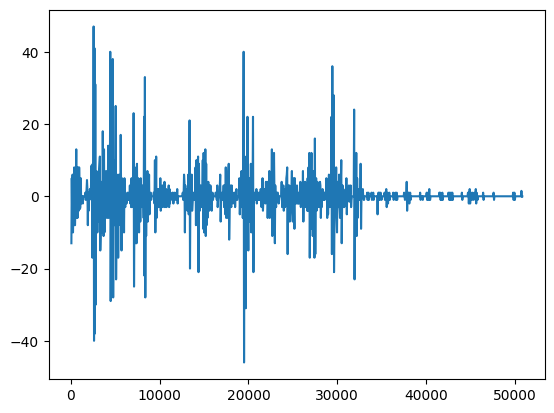

In [19]:
# Be sure the data is sorted according to week
CO = CO.sort_values(by=['week'])

# Find the difference in cases for each consecutive week
CO['dcases'] = CO['cases'].diff()

# Find the difference in weeks for each consecutive week
#  should be 1, except for when there are missing weeks
CO['dweeks'] = CO['week'].diff()

# Find the numerical derivative, dcases/dweeks
CO['dcases/dweeks'] = CO['dcases'] / CO['dweeks']

# Plot the numerical derivative
CO['dcases/dweeks'].plot()

Repeat the activity by looking at the difference in cases over a time period of 10 weeks. You can use the argument `periods = 10` inside of the `.diff()` function.

<Axes: >

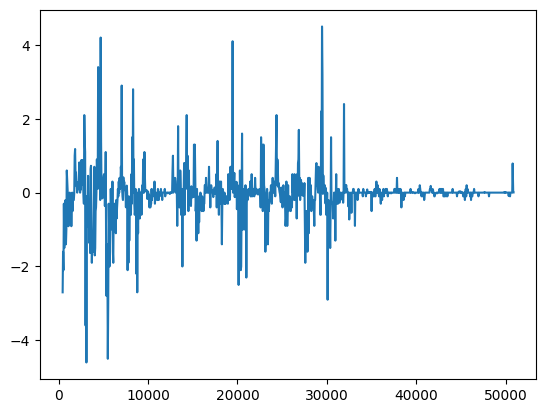

In [22]:
# Be sure the data is sorted according to week
CO = CO.sort_values(by=['week'])

# Find the difference in cases for each consecutive week
CO['dcases'] = CO['cases'].diff(periods=10)

# Find the difference in weeks for each consecutive week
#  should be 1, except for when there are missing weeks
CO['dweeks'] = CO['week'].diff(periods =10)

# Find the numerical derivative, dcases/dweeks
CO['dcases/dweeks'] = CO['dcases'] / CO['dweeks']

# Plot the numerical derivative
CO['dcases/dweeks'].plot()

# Statistics
### Distributions
The distribution describes the makeup of the data in each column. Distributions can be either discrete (set numbers) or continuous (all numbers in a range are possible). Plotting a distribution allows you not only to see what the data look like, but also to determine if there are suspicious values or if you need to do additional preprocessing.

In [ ]:
# Plot the distribution of 'incidence_per_capita'; use only non-zero values
UT[UT['incidence_per_capita'] != 0]['incidence_per_capita'].hist()

**Activity:**


1. Plot the distribution of `'incidence_per_capita'` for your state of choice.
2. Sometimes the log scaled values are more useful or give better results. Log scale the `'incidence_per_capita'` and observe the difference.

<Axes: >

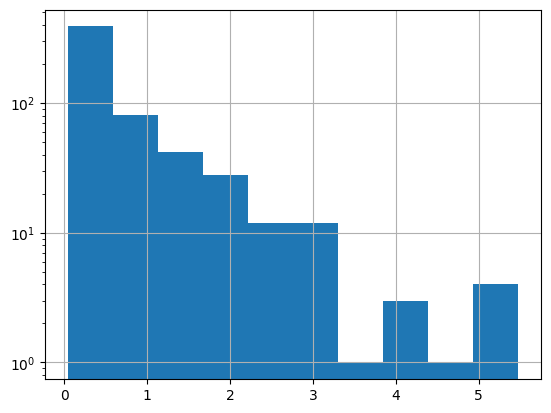

In [31]:
import numpy as np
CO[CO['incidence_per_capita'] != 0]['incidence_per_capita'].hist(log=True)

### Mean and standard deviation
These values are useful in describing a normal distribution. There are also other potentially useful statistical measures (such as kurtosis and skew, which describe deviations from a normal distribution). These statistical measures are not only useful for describing data, but you can potentially use them as features in your machine learning model.

In [ ]:
print('All Utah cases')
UT['cases'].describe()

In [ ]:
UT_non0 = UT[UT['cases'] != 0]
print('Non-zero Utah cases')
UT_non0['cases'].describe()

**Activity:**

1. Display the mean, standard deviation, quartiles, max, and min for the data in another state besides Utah.
2. Save the statistics as variables for later use. Use `UT['cases'].mean()`, `.std()`, `.quantile()`, `.max()`, and `.min()`.
3. Find the kurtosis and skew of the data. Use `.kurtosis()` and `.skew()`

In [28]:
print('All Colorado cases')
print(CO['cases'].describe())
mean = CO['cases'].mean()
std = CO['cases'].std()
quantile = CO['cases'].quantile()
max = CO['cases'].max()
min = CO['cases'].min()

kurtosis = CO['cases'].kurtosis()
skew = CO['cases'].skew()

print(kurtosis)
print(skew)

All Colorado cases
count    1058.000000
mean        3.779773
std         7.294046
min         0.000000
25%         0.000000
50%         1.000000
75%         4.000000
max        57.000000
Name: cases, dtype: float64
14.732701034678955
3.394038007650213
